<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/sorgo_ANN_otimiza_test_fev_13_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.model_selection import train_test_split

In [2]:
#n = input('Entre sua escolha (0,1 ou 2) para  (ponta negra, 1g100, dbk550:')
uploaded = files.upload()

Saving Dados_1G100_RN.xlsx to Dados_1G100_RN (2).xlsx


In [3]:
# C:\Users\User\Documents\Atividades_andamento\Layse
choose = ["sorgopontanegra.csv","Sorgo_1G100.csv","Sorgo_DBK550.csv"]
#DAT=pd.read_csv(choose[int(n)])
# DAT = pd. read_excel('Dados 1G100_Pontos novos.xlsx')
# DAT = pd. read_excel('Dados completos 1G100.xlsx')
DAT = pd. read_excel('Dados_1G100_RN.xlsx')
print(DAT.head())

   Run       SO    IN       GL       Et  Ethanol (L/100kg sorgo)       Fi  \
0    1   35.000  15.0  26.4169  12.1970                44.168025  29.5200   
1    2   35.000  45.0  27.9425  14.6410                53.018287  26.4942   
2    3  165.000  15.0  86.3195  43.6347                33.517456  58.5103   
3    4  165.000  45.0  89.0621  43.4471                33.373353  52.4981   
4    5   25.445  30.0  18.2450   9.7402                48.516383  27.0320   

        ST         Y1  
0  28.4169  83.995385  
1  28.9425  98.995123  
2  87.9128  97.131251  
3  90.6521  93.791185  
4  21.2450  89.720201  


In [4]:
def zscore(x,xold):
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=(x[:,j]-avgx)/stdx
  return x

In [5]:
def z2val(x,xold):
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=x[:,j]*stdx+avgx
  return x

In [6]:
DAT.columns=['Run', 'SO', 'IN', 'GL ', 'Et', 'Et2', 'Fi', 'ST', 'Y1']

In [7]:
Col_Indep=['SO','IN']
names =[ 'Et']
#names =[ 'Y1']

In [8]:
nrows, ncols = DAT.shape
itrain, itest =train_test_split(range(nrows), test_size=0.2,random_state=14) # 2,3,4,5,6,7,8,9,10,11,22

In [9]:
# separa as colunas de interesse
x_train=DAT[Col_Indep].iloc[itrain,:].copy()
y_train=DAT[names].iloc[itrain,:].copy()
x_test = DAT[Col_Indep].iloc[itest,:].copy()
y_test = DAT[names].iloc[itest,:].copy()

In [10]:
xold, yold = DAT[Col_Indep],DAT[names]

In [11]:
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)
x_test, y_test = zscore(x_test,xold), zscore(y_test,yold)

In [12]:
x_train

array([[ 1.28040331, -1.32787567],
       [-1.22016134,  1.32787567],
       [ 1.28040331,  0.88525045],
       [ 1.46313688,  0.        ],
       [-1.22016134, -1.32787567],
       [ 0.99187662, -0.88525045],
       [ 0.03012098,  0.        ],
       [ 0.03012098,  1.52263077],
       [ 0.03012098, -1.52263077],
       [-1.22016134, -0.88525045],
       [ 0.03012098,  0.        ],
       [-0.16223014, -0.44262522]])

In [13]:
# define a rede neural
def optmANN(x_train,x_test,y_train,y_test):
  resp_scored = []
  for i in range(1,15):
    r_calc =[]
    N_Hidden = i
    clf = MLPRegressor(solver='lbfgs',activation='tanh',
                      alpha=1e-5,hidden_layer_sizes=(N_Hidden),
                        random_state=1)
    clf.fit(x_train, y_train)
    y_calc_train=clf.predict(x_train)
    y_calc_test=clf.predict(x_test)
    y_calc_train=pd.DataFrame(y_calc_train)
    y_calc_test=pd.DataFrame(y_calc_test)
    r2_test= r2_score(y_test,y_calc_test)
    r2_train = r2_score(y_train,y_calc_train)
    r_calc.append(i)
    r_calc.append(r2_train)
    r_calc.append(r2_test)
    resp_scored.append(r_calc)

  df = pd.DataFrame(resp_scored,columns=['hidden','r2 train','r2 test'])
  return df

In [14]:
df = optmANN(x_train,x_test,y_train,y_test)
df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

,hidden,r2 train,r2 test
0,1,0.989610,0.973181
1,2,0.992639,0.963258
2,3,0.999602,0.539660
3,4,0.999983,0.854856
4,5,0.999993,0.798921
5,6,0.999992,0.810120
6,7,0.999993,0.934437
7,8,0.999989,0.872480
8,9,0.999993,0.952931
9,10,0.999992,0.917517


In [15]:
# define a rede neural
N_Hidden= 8
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden),
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=8,
             random_state=1, solver='lbfgs')

In [16]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [17]:
# transforma a saida da rede em dataframe
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)

In [18]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train, y_calc_test = z2val(y_calc_train,yold), z2val(y_calc_test,yold)
y_train, y_test = z2val(y_train,yold), z2val(y_test,yold)

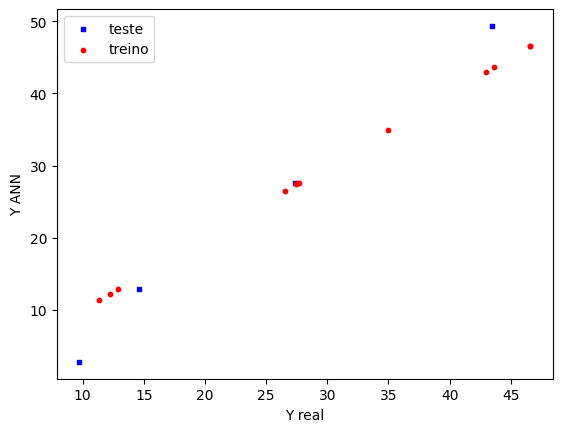

In [19]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Y ANN')
plt.xlabel('Y real')
plt.show()

In [20]:
r2_test= r2_score(y_test,y_calc_test)
r2_train = r2_score(y_train,y_calc_train)
print('r2 (train)=',r2_train)
print('r2 (test)=',r2_test)

r2 (train)= 0.9999893718692819
r2 (test)= 0.872480335782649


In [21]:
y_calc_train

array([[43.67343459],
       [12.85928257],
       [46.59468118],
       [46.58515251],
       [12.2255471 ],
       [42.90945751],
       [27.59141799],
       [34.97323566],
       [26.51374748],
       [11.31552991],
       [27.59141799],
       [27.43410885]])

In [22]:
y_train

array([[43.6347    ],
       [12.86681667],
       [46.58923333],
       [46.5963    ],
       [12.197     ],
       [42.96603333],
       [27.5059    ],
       [34.9691    ],
       [26.5236    ],
       [11.34551667],
       [27.6662    ],
       [27.40686667]])

In [23]:
DAT

,Run,SO,IN,GL,Et,Et2,Fi,ST,Y1
0,1,35.000,15.0,26.416900,12.197000,44.168025,29.52000,28.416900,83.995385
1,2,35.000,45.0,27.942500,14.641000,53.018287,26.49420,28.942500,98.995123
2,3,165.000,15.0,86.319500,43.634700,33.517456,58.51030,87.912800,97.131251
3,4,165.000,45.0,89.062100,43.447100,33.373353,52.49810,90.652100,93.791185
4,5,25.445,30.0,18.245000,9.740200,48.516383,27.03200,21.245000,89.720201
5,6,174.500,30.0,106.294100,46.596300,33.843791,49.56220,106.294100,88.611969
6,7,100.000,12.8,60.953600,26.523600,33.616730,41.31000,62.943800,82.462901
7,8,100.000,47.2,60.943800,34.969100,44.320786,44.37400,69.373800,98.643409
8,9,100.000,30.0,59.275200,27.666200,35.064892,52.59800,60.845200,88.982026
9,10,100.000,30.0,59.740400,27.505900,34.861724,46.95500,61.270400,87.852524


In [24]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [25]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)


In [26]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes).reshape(-1,1)
Y =  z2val(Y,yold)
print(Y)

          SO         IN
0  150.42232  25.902886
[[64.22013174]]


In [27]:
# separa as colunas de interesse
x_train, y_train = DAT[Col_Indep],DAT[names]
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)

In [28]:
df = optmANN(x_train,x_train,y_train,y_train)
df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

,hidden,r2 train,r2 test
0,1,0.987161,0.987161
1,2,0.994658,0.994658
2,3,0.998253,0.998253
3,4,0.998779,0.998779
4,5,0.999400,0.999400
5,6,0.999404,0.999404
6,7,0.999377,0.999377
7,8,0.999404,0.999404
8,9,0.999404,0.999404
9,10,0.999404,0.999404


In [29]:
# define a rede neural
N_Hidden= 8
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden),
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=8,
             random_state=1, solver='lbfgs')

In [30]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [31]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)

In [32]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Y=clf.predict(Condicoes).reshape(-1,1)

Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y =  z2val(Y,yold)
print(Y)

          SO         IN
0  150.42232  33.663011
[[46.99167009]]


In [33]:
y_calc_train

array([[43.67343459],
       [12.85928257],
       [46.59468118],
       [46.58515251],
       [12.2255471 ],
       [42.90945751],
       [27.59141799],
       [34.97323566],
       [26.51374748],
       [11.31552991],
       [27.59141799],
       [27.43410885]])

In [34]:
y_calc_test

array([[27.59141799],
       [49.35602129],
       [ 2.76767788],
       [12.85928257]])

In [35]:
# calcula os resultados:
X = DAT[Col_Indep]
X = zscore(X,xold)
y_calc = clf.predict(X).reshape(-1,1)
y_calc =  z2val(y_calc,yold)
print(y_calc) # resposta de todos valores sequenciais

[[12.21440246]
 [13.75853796]
 [43.62466504]
 [43.46350827]
 [ 9.72486519]
 [46.60535644]
 [26.52662076]
 [34.97174136]
 [27.51065633]
 [27.51065633]
 [27.51065633]
 [27.41237509]
 [11.33417278]
 [42.96123238]
 [46.57610576]
 [13.75853796]]
